In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [34]:
df=pd.read_csv("HR_Data_MNC_Data.csv")

In [35]:
df

,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084
3,3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689
4,4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082
...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,1999995,EMP1999996,Cody Russell,Operations,Logistics Coordinator,2010-08-31,"Casefurt, Serbia",3,14,Active,Remote,657648
1999996,1999996,EMP1999997,Tracey Smith,IT,Software Engineer,2021-05-07,"Dannyport, Kuwait",3,4,Active,On-site,1030109
1999997,1999997,EMP1999998,Tracy Lee,Sales,Business Development Manager,2024-05-29,"Craighaven, Nigeria",5,1,Active,Remote,1313085
1999998,1999998,EMP1999999,Michael Roberson,IT,Software Engineer,2023-02-14,"Jonathanmouth, Djibouti",4,2,Retired,On-site,1479727


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   Employee_ID         object
 2   Full_Name           object
 3   Department          object
 4   Job_Title           object
 5   Hire_Date           object
 6   Location            object
 7   Performance_Rating  int64 
 8   Experience_Years    int64 
 9   Status              object
 10  Work_Mode           object
 11  Salary_INR          int64 
dtypes: int64(4), object(8)
memory usage: 183.1+ MB


In [37]:
df[df.duplicated()]

,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR


In [38]:
df.isnull().sum()

Unnamed: 0            0
Employee_ID           0
Full_Name             0
Department            0
Job_Title             0
Hire_Date             0
Location              0
Performance_Rating    0
Experience_Years      0
Status                0
Work_Mode             0
Salary_INR            0
dtype: int64

In [39]:
df.drop(columns='Unnamed: 0', inplace=True)

In [40]:
df['Hire_Date']

0          2011-08-10
1          2018-03-02
2          2023-03-20
3          2023-10-12
4          2024-12-09
              ...    
1999995    2010-08-31
1999996    2021-05-07
1999997    2024-05-29
1999998    2023-02-14
1999999    2020-11-11
Name: Hire_Date, Length: 2000000, dtype: object

In [ ]:
df['Hire_Date']=pd.to_datetime(df['Hire_Date'])

In [ ]:
df.info()

How many employers register ,terminated ,Active ,retrive

In [15]:
status=df['Status'].value_counts()

In [16]:
status

Status
Active        1401558
Resigned       398660
Retired         99912
Terminated      99870
Name: count, dtype: int64

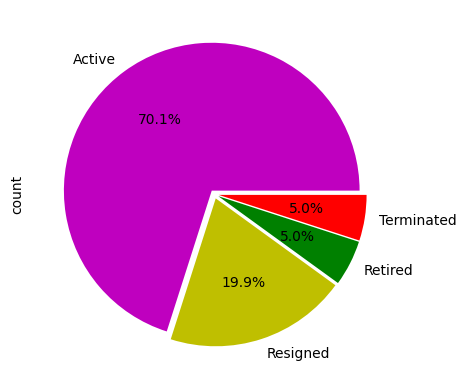

In [17]:
status.plot(kind='pie' ,colors='mygr' ,autopct='%1.1f%%' ,explode=(0.03,0.03,0.03,0.03))
plt.show()

### what is the distribution of work modes (On-Site ,Remote)

In [18]:
work=df['Work_Mode'].value_counts()

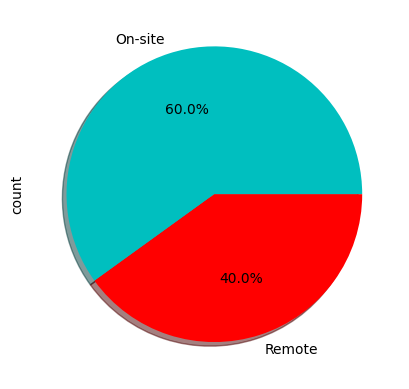

In [19]:
work.plot(kind='pie',colors='cr',autopct='%1.1f%%',shadow=True)
plt.show()

In [20]:
##how man

<Axes: ylabel='count'>

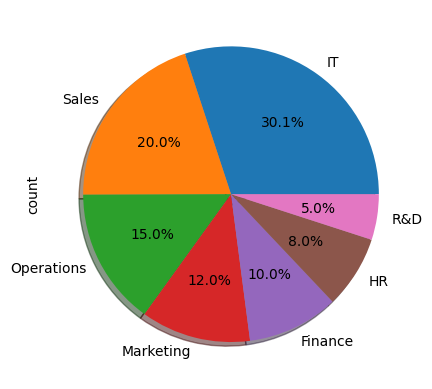

In [21]:
df['Department'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True)

In [22]:
df['Job_Title'].value_counts()

Job_Title
Software Engineer                300358
Sales Executive                  199982
Operations Executive             150058
Data Analyst                     120375
Marketing Executive              120154
Account Manager                  119929
Accountant                       100307
DevOps Engineer                   90197
Logistics Coordinator             90188
HR Executive                      79348
SEO Specialist                    71692
Business Development Manager      60233
IT Manager                        60224
Financial Analyst                 59815
Research Scientist                50017
Talent Acquisition Specialist     47994
Supply Chain Manager              44935
Content Strategist                36154
CTO                               29888
Product Developer                 29872
Finance Manager                   29799
HR Manager                        23841
Sales Director                    19887
Operations Director               14914
Lab Technician                

In [23]:
plt.figure(figsize(10,6))
sns.countplot(x='Job_Title',data=df)
plt.xtricks(rotation='vertical')
plt.show()

NameError: name 'figsize' is not defined

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Job_Title', data=df,palette='BrBG')
plt.xticks(rotation='vertical')

plt.show()

### Avg salary by department

In [24]:
dept=df.groupby('Department')['Salary_INR'].mean().astype(int)

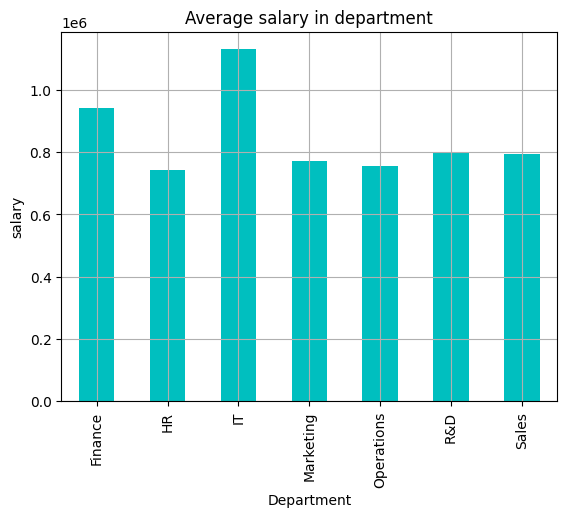

In [25]:
dept.plot(x=dept.index,y=dept.values,kind='bar',color='c')
plt.grid()
plt.title('Average salary in department')
plt.ylabel("salary")
plt.show()

In [26]:
df.groupby('Job_Title')['Salary_INR'].mean().astype(int).reset_index().sort_values(by='Salary_INR',ascending=False)

,Job_Title,Salary_INR
14,IT Manager,2098155
9,Finance Manager,1743241
13,HR Manager,1252401
3,Business Development Manager,1252016
26,Software Engineer,1199260
10,Financial Analyst,1051522
2,Brand Manager,803127
15,Innovation Manager,801870
28,Talent Acquisition Specialist,801422
5,CTO,801402


### how many employees Resigned ,terminated in each department

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 11 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Employee_ID         object
 1   Full_Name           object
 2   Department          object
 3   Job_Title           object
 4   Hire_Date           object
 5   Location            object
 6   Performance_Rating  int64 
 7   Experience_Years    int64 
 8   Status              object
 9   Work_Mode           object
 10  Salary_INR          int64 
dtypes: int64(3), object(8)
memory usage: 167.8+ MB


In [28]:
r_emp=df[df['Status']=='Resigned'].groupby('Department')['Status'].count()

In [29]:
t_emp=df[df['Status']=='Terminated'].groupby('Department')['Status'].count()

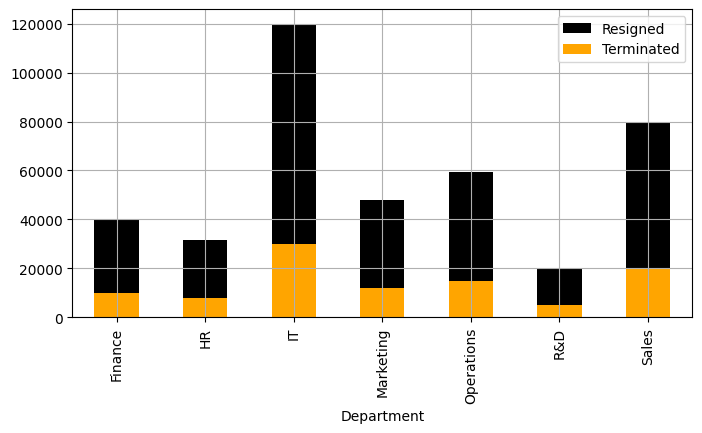

In [30]:
plt.figure(figsize=(8,4))
r_emp.plot(x=r_emp.index,y=r_emp.values,kind='bar',color='black',legend=True ,label='Resigned')
t_emp.plot(x=t_emp.index,y=t_emp.values,kind='bar',color='orange',legend=True ,label='Terminated')
plt.grid()
plt.show()

# what is average performance rating by department

In [31]:
PR=df.groupby('Department')['Performance_Rating'].mean().astype(int)

In [32]:
PR

Department
Finance       2
HR            2
IT            2
Marketing     3
Operations    2
R&D           3
Sales         3
Name: Performance_Rating, dtype: int64